In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

    sepal_length  sepal_width  petal_length  petal_width          species
6            6.3          3.3           4.7          1.6  Iris-versicolor
79           7.2          3.0           5.8          1.6   Iris-virginica
22           6.3          2.5           4.9          1.5  Iris-versicolor
5            5.7          2.8           4.5          1.3  Iris-versicolor
8            6.6          2.9           4.6          1.3  Iris-versicolor
['Iris-versicolor' 'Iris-virginica']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107d20320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x108e30a20>]], dtype=object)

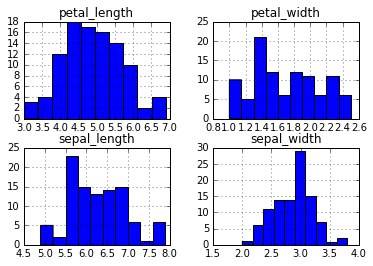

In [9]:
# Read in dataset
iris = pd.read_csv("iris.csv")

# shuffle rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())

# There are 2 species
print(iris.species.unique())

iris.hist()

In [10]:
z = np.asarray([[9, 5, 4]])
y = np.asarray([[-1, 2, 4]])

# np.dot is used for matrix multiplication
# z is 1x3 and y is 1x3,  z * y.T is then 1x1
print(np.dot(z,y.T))

[[17]]


In [11]:
# Variables to test sigmoid_activation
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)

# The first observation
x0 = X[0]

# Initialize thetas randomly 
theta_init = np.random.normal(0,0.01,size=(5,1))

def sigmoid_activation(x, theta):
    power = -1 * np.dot(theta.T, x)
    return 1 / (1 + np.exp(power))

a1 = sigmoid_activation(x0, theta_init)
print(a1)

[ 0.51622302]


In [12]:
# First observation's features and target
x0 = X[0]
y0 = y[0]

# Initialize parameters, we have 5 units and just 1 layer
theta_init = np.random.normal(0,0.01,size=(5,1))

#h(theta) -> sigmoid activation
def sigmoid_activation(x, theta):
    x = np.asarray(x)
    theta = np.asarray(theta)
    power = -1 * np.dot(theta.T, x)
    return 1 / (1 + np.exp(power))

def singlecost(X, y, theta):
    h = sigmoid_activation(X, theta)
    cost = -np.mean((y * np.log(h)) + ((1-y) * np.log(1 - h)))
    return cost

first_cost = singlecost(x0, y0, theta_init)
print(first_cost)

0.705022180185


In [13]:
# Initialize parameters
theta_init = np.random.normal(0,0.01,size=(5,1))
print(theta_init)

# Store the updates into this array
grads = np.zeros(theta_init.shape)
print(grads)

[[-0.00441201]
 [ 0.00393422]
 [ 0.00708376]
 [ 0.00884704]
 [ 0.00290378]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [21]:
grads = []

for j, obs in enumerate(X):
    # Compute activation
    h = sigmoid_activation(obs, theta_init)
    # Get delta
    delta = (y[j]-h) * h * (1-h) * obs
    # accumulate
    grads.append(delta)

In [22]:
df = pd.DataFrame(grads)
df.head()

,0,1,2,3,4
0,0.119139,0.750575,0.393158,0.559953,0.190622
1,-0.130980,-0.943054,-0.392939,-0.759683,-0.209568
2,0.119422,0.752356,0.298554,0.585166,0.179132
3,0.119715,0.682373,0.335201,0.538716,0.155629
4,0.119369,0.787836,0.346170,0.549098,0.155180


In [23]:
df.mean()

0   -0.005488
1   -0.075465
2   -0.028656
3   -0.108102
4   -0.053125
dtype: float64

In [30]:
# Store the updates into this array
grads = np.zeros(theta_init.shape)
print(grads)

for j, obs in enumerate(X):
    # Compute activation
    h = sigmoid_activation(obs, theta_init)
    # Get delta
    delta = (y[j]-h) * h * (1-h) * obs
    # accumulate
    grads += delta[:,np.newaxis]

grads = grads / X.shape[0]
    
print(grads)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[-0.00548844]
 [-0.07546493]
 [-0.02865556]
 [-0.10810192]
 [-0.05312455]]


In [31]:
# Store the updates into this array
grads = np.zeros(theta_init.shape)
print(grads)

for j, obs in enumerate(X):
    # Compute activation
    h = sigmoid_activation(obs, theta_init)
    # Get delta
    delta = (y[j]-h) * h * (1-h) * obs
    # accumulate
    grads += delta[:,np.newaxis] / X.shape[0]
    
print(grads)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[-0.00548844]
 [-0.07546493]
 [-0.02865556]
 [-0.10810192]
 [-0.05312455]]


In [32]:
blah = np.asarray([1,2,3,4,5])

In [34]:
blah[np.newaxis, :]

array([[1, 2, 3, 4, 5]])

In [35]:
blah[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [36]:
blah[:, np.newaxis, np.newaxis]

array([[[1]],

       [[2]],

       [[3]],

       [[4]],

       [[5]]])

In [37]:
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

def feedforward(X, theta0, theta1):
    # feedforward to the first layer
    a1 = sigmoid_activation(X.T, theta0).T
    # add a column of ones for bias term
    a1 = np.column_stack([np.ones(a1.shape[0]), a1])
    # activation units are then inputted to the output layer
    out = sigmoid_activation(a1.T, theta1)
    return out

h = feedforward(X, theta0_init, theta1_init)

In [38]:
h

array([[ 0.49555694,  0.49556768,  0.49556579,  0.49556156,  0.49556295,
         0.49557209,  0.49555516,  0.49555897,  0.49556084,  0.4955723 ,
         0.49555385,  0.49556838,  0.49555531,  0.49555917,  0.49555775,
         0.49556183,  0.49555668,  0.49556446,  0.49556288,  0.49556364,
         0.49555702,  0.49556885,  0.49555926,  0.4955579 ,  0.49556143,
         0.49556025,  0.49556873,  0.49556106,  0.49556386,  0.49555666,
         0.49556414,  0.49555584,  0.49556181,  0.49556438,  0.49555918,
         0.49556002,  0.49555436,  0.49556175,  0.49555962,  0.49556221,
         0.49555901,  0.49555907,  0.49555561,  0.4955654 ,  0.49556134,
         0.4955576 ,  0.49556082,  0.49555695,  0.49555853,  0.49555996,
         0.49555587,  0.49555948,  0.49556282,  0.49555587,  0.49556319,
         0.49556284,  0.49555931,  0.49556991,  0.49556391,  0.49555752,
         0.49556181,  0.4955608 ,  0.49556249,  0.49556212,  0.49555551,
         0.49556071,  0.4955599 ,  0.49555935,  0.4

In [51]:
a1 = sigmoid_activation(X.T, theta0_init).T
a1[:5]

array([[ 0.47404953,  0.49555336,  0.49137511,  0.47663514],
       [ 0.47156486,  0.49866959,  0.4917116 ,  0.47251391],
       [ 0.47558834,  0.49874679,  0.4927978 ,  0.47638924],
       [ 0.47689527,  0.49731234,  0.49207528,  0.47882084],
       [ 0.47483341,  0.49658998,  0.49257809,  0.47449602]])

In [52]:
sigmoid_activation(a1, theta1_init)

ValueError: shapes (1,5) and (100,4) not aligned: 5 (dim 1) != 100 (dim 0)

In [53]:
a1 = np.column_stack([np.ones(a1.shape[0]), a1])
a1[:5]

array([[ 1.        ,  0.47404953,  0.49555336,  0.49137511,  0.47663514],
       [ 1.        ,  0.47156486,  0.49866959,  0.4917116 ,  0.47251391],
       [ 1.        ,  0.47558834,  0.49874679,  0.4927978 ,  0.47638924],
       [ 1.        ,  0.47689527,  0.49731234,  0.49207528,  0.47882084],
       [ 1.        ,  0.47483341,  0.49658998,  0.49257809,  0.47449602]])

In [55]:
sigmoid_activation(a1.T, theta1_init)

array([[ 0.49555694,  0.49556768,  0.49556579,  0.49556156,  0.49556295,
         0.49557209,  0.49555516,  0.49555897,  0.49556084,  0.4955723 ,
         0.49555385,  0.49556838,  0.49555531,  0.49555917,  0.49555775,
         0.49556183,  0.49555668,  0.49556446,  0.49556288,  0.49556364,
         0.49555702,  0.49556885,  0.49555926,  0.4955579 ,  0.49556143,
         0.49556025,  0.49556873,  0.49556106,  0.49556386,  0.49555666,
         0.49556414,  0.49555584,  0.49556181,  0.49556438,  0.49555918,
         0.49556002,  0.49555436,  0.49556175,  0.49555962,  0.49556221,
         0.49555901,  0.49555907,  0.49555561,  0.4955654 ,  0.49556134,
         0.4955576 ,  0.49556082,  0.49555695,  0.49555853,  0.49555996,
         0.49555587,  0.49555948,  0.49556282,  0.49555587,  0.49556319,
         0.49556284,  0.49555931,  0.49556991,  0.49556391,  0.49555752,
         0.49556181,  0.4955608 ,  0.49556249,  0.49556212,  0.49555551,
         0.49556071,  0.4955599 ,  0.49555935,  0.4

In [56]:
# Multiple neural network cost function

theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

# X and y are in memory and should be used as inputs to multiplecost()

def multiplecost(X, y, theta0, theta1):
    h = feedforward(X, theta0, theta1)
    cost = -np.mean((y * np.log(h)) + ((1-y) * np.log(1 - h)))
    return cost

c = multiplecost(X, y, theta0_init, theta1_init)
c

0.69311794566452167

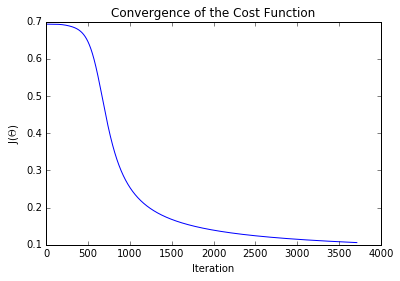

In [61]:
# Learn

# Use a class for this model, it's good practice and condenses the code
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = convergence_thres
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # feed through network
        l1, l2 = self._feedforward(X) 
        # compute error
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # negative of average error
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # feedforward to the first layer
        l1 = sigmoid_activation(X.T, self.theta0).T
        # add a column of ones for bias term
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # activation units are then inputted to the output layer
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1  # set an inital costprev to past while loop
        counter = 0  # intialize a counter

        # Loop through until convergence
        for counter in range(self.maxepochs):
            # feedforward through network
            l1, l2 = self._feedforward(X)

            # Start Backpropagation
            # Compute gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)

            # Update parameters by averaging gradients and multiplying by the learning rate
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and check for convergence
            counter += 1  # Count
            costprev = cost  # Store prev cost
            cost = self._multiplecost(X, y)  # get next cost
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001 
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# Train model
model.learn(X, y)

# Plot costs
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()

In [69]:
X_train = X[:70]
y_train = y[:70]

X_test = X[70:]
y_test = y[70:]

In [70]:
X_train.shape, X_test.shape

((70, 5), (30, 5))

In [72]:
from sklearn.metrics import roc_auc_score
# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)

model.learn(X_train, y_train)

probs = model.predict(X_test)

In [73]:
probs

array([[ 0.01516645,  0.98477511,  0.04229205,  0.458743  ,  0.90278461,
         0.01751108,  0.72876492,  0.98363337,  0.98505725,  0.94064199,
         0.0301101 ,  0.03305618,  0.87804694,  0.97710084,  0.94938094,
         0.1044316 ,  0.02949531,  0.02295211,  0.2962987 ,  0.99224   ,
         0.71398475,  0.96646066,  0.27366724,  0.01896144,  0.9930441 ,
         0.0205865 ,  0.98737103,  0.04185287,  0.99178876,  0.98497428]])

In [77]:
probs[0].shape, y_test.shape

((30,), (30,))

In [78]:
roc_auc_score(y_test, probs[0])

1.0